# **Project Name: OCD Patient Dataset: Demographics & Clinical Data**

Contribution - Dinesh Halder

internship ID: UMIP278400

# **Project Overview**

**---- 1. Introduction ----**

This project aims to analyze the OCD patient dataset and implement a clustering algorithm.

**---- 2. Data set ----**

* OCD Patient Dataset_ Demographics & Clinical Data.csv: Contains details of OCD patients, including biological, societal, and family history attributes.

**---- 3. Data Preprocessing ----**

**1. Handling Missing Values**
* Dropped rows where "Previous Diagnoses" or "Medications" had missing values (dropna).
* Reset the index after dropping rows (reset_index).

**2. Dropping Irrelevant Columns**

* Removed "day", "month", and "year" columns as they were unnecessary.

**3. Separating Categorical and Numerical Data**

* Identified categorical columns (select_dtypes(include="object")).
* Identified numerical columns (select_dtypes(include=["int64", "float64"])).

**4. Encoding Categorical Variables**

* Applied One-Hot Encoding using OneHotEncoder(drop="first") to avoid dummy variable traps.
* Converted the encoded categorical data into a DataFrame.
* Combined the encoded categorical features with numerical features.

**5. Feature Scaling**

* Applied Z-Score Standardization (StandardScaler()) to scale numerical features to have a mean of 0 and a standard deviation of 1.

**---- 4. Exploretory Data Analysis ----**

1. Gender
* Total participants: 747 females and 753 males.

* Gender distributions for age and other attributes are similar, showing no significant differences.

2. Modal age:

* Female: 49 years.

* Male: 70 years.

3. Age
* Range: 18 to 75 years for both genders.

* Central tendencies and variability (mean, median, and standard deviation) are comparable between males and females.

4. Marital Status
  Almost evenly distributed:

* Single: 511 participants.

* Married: 507 participants.

* Divorced: 482 participants.

  No significant differences between categories.

5. Ethnicity
  Diverse representation with nearly balanced counts:

* Caucasian: 398.

* Hispanic: 392.

* Asian: 386.

* African: 324.

6. Obsession Types
  Breakdown of participants by obsession type:

* Harm-related obsessions: 333 cases (most common).

* Contamination: 306 cases.

* Religious: 303 cases.

* Symmetry: 280 cases.

* Hoarding: 278 cases (least common).

  These types are fairly evenly distributed, but some differences in prevalence are noted.

7. Family History of OCD
* Participants with family history: 760.

* Participants without family history: 740.

  Slightly higher count of individuals with a family history, hinting at a potential hereditary component.

---------------------Overall Observations---------------------

* No strong correlation between the attributes based on the provided statistics.

* The dataset appears well-balanced across gender, ethnicity, and marital status, making it representative.

* A deeper dive into patterns related to "Obsession Types" and "Family History of OCD" could reveal nuanced trends.

**---- 5. Model Building----**

* Elbow Method: Determines the optimal number of clusters.
* Silhouette Score: Evaluates clustering quality.
* PCA for Visualization: Enables 2D plotting of clusters.
* Cluster Summary: Computes mean values of numerical features for each cluster.
* Cluster Assignment & Display: Adds cluster labels to the dataset and prints sample data.


# **EDA**

## 1. Know Your Data

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch




### **Dataset Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_set= pd.read_csv('/content/drive/MyDrive/project internship/OCD Patient Dataset/OCD Patient Dataset_ Demographics & Clinical Data.csv')
display(data_set)

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


### **Dataset Overview**

In [ ]:
num_row, num_col= data_set.shape
print(f"No. of Rows: {num_row}")
print(f"No. of Columns: {num_col}")

No. of Rows: 1500
No. of Columns: 17


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

In [ ]:
data_set.isnull().sum()

,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,248
Family History of OCD,0


In [ ]:
duplicate_rows= data_set.duplicated().sum()
print(f"No. of Duplicate Rows: {duplicate_rows}")

No. of Duplicate Rows: 0


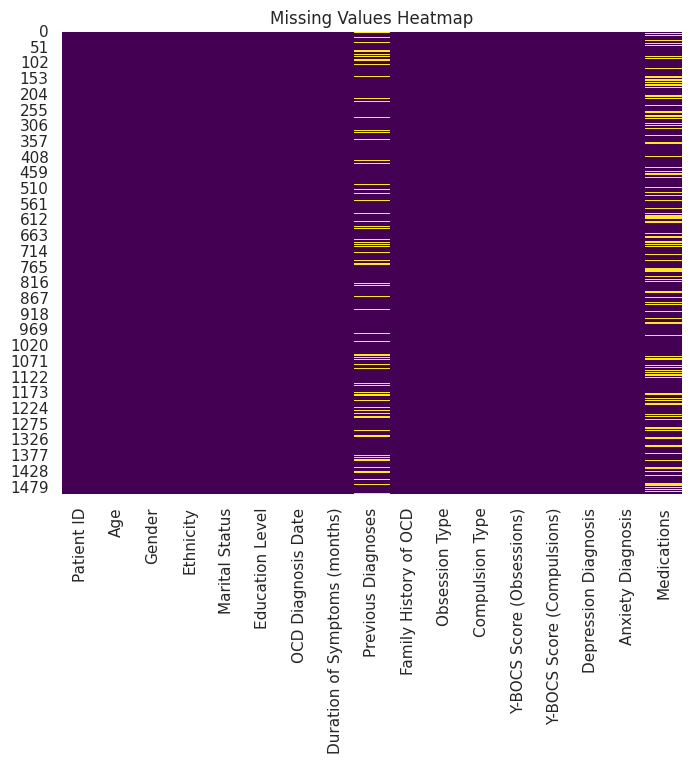

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data_set.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 2. Understanding Variables

In [ ]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient ID,1500.0,5541.254000,2562.389469,1017.0,3338.0,5539.5,7745.5,9995.0
Age,1500.0,46.781333,16.830321,18.0,32.0,47.0,61.0,75.0
Duration of Symptoms (months),1500.0,121.745333,67.404610,6.0,64.0,121.0,178.0,240.0
Y-BOCS Score (Obsessions),1500.0,20.048000,11.823884,0.0,10.0,20.0,31.0,40.0
Y-BOCS Score (Compulsions),1500.0,19.626000,11.782870,0.0,9.0,20.0,29.0,40.0


In [ ]:
data_set['Age'].mode()

,Age
0,70


In [ ]:
for i in data_set.columns:
  print(f"No. of Unique Values in {i}: {data_set[i].nunique()}")

No. of Unique Values in Patient ID: 1393
No. of Unique Values in Age: 58
No. of Unique Values in Gender: 2
No. of Unique Values in Ethnicity: 4
No. of Unique Values in Marital Status: 3
No. of Unique Values in Education Level: 4
No. of Unique Values in OCD Diagnosis Date: 1218
No. of Unique Values in Duration of Symptoms (months): 235
No. of Unique Values in Previous Diagnoses: 4
No. of Unique Values in Family History of OCD: 2
No. of Unique Values in Obsession Type: 5
No. of Unique Values in Compulsion Type: 5
No. of Unique Values in Y-BOCS Score (Obsessions): 41
No. of Unique Values in Y-BOCS Score (Compulsions): 41
No. of Unique Values in Depression Diagnosis: 2
No. of Unique Values in Anxiety Diagnosis: 2
No. of Unique Values in Medications: 3


## 3. Data Vizualization, Storytelling & Experimenting with charts

In [ ]:
df= data_set.copy()

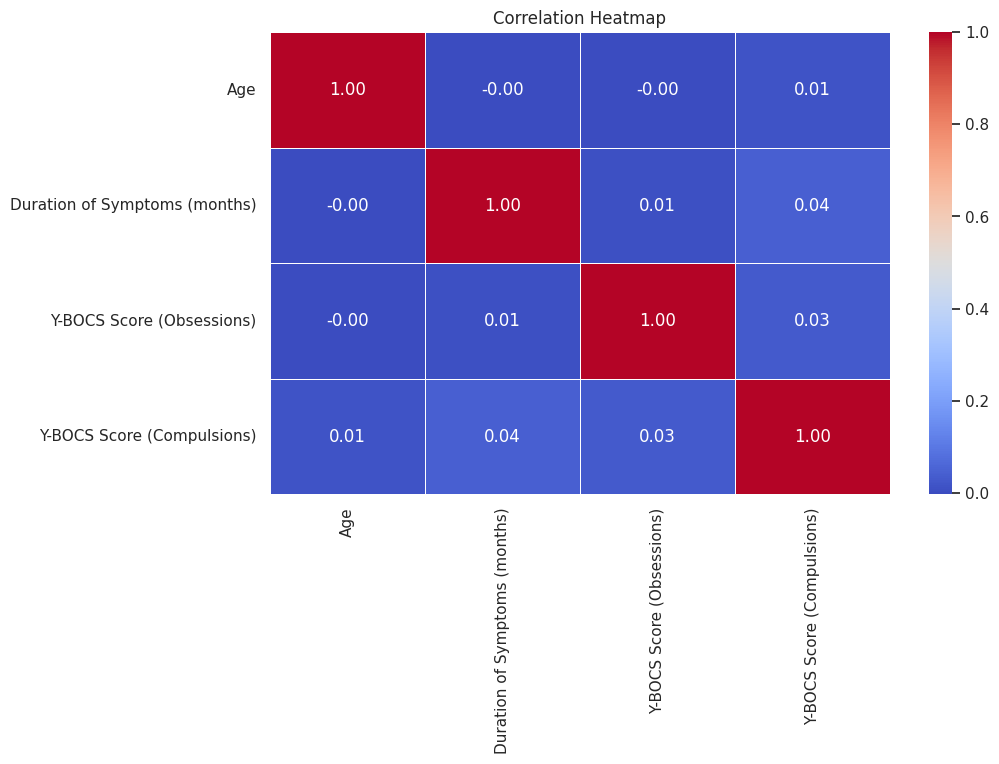

In [ ]:
selected_cols= df.select_dtypes(np.int64).drop(columns=['Patient ID'])

plt.figure(figsize=(10,6))
sns.heatmap(selected_cols.corr(),annot=True, cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df= df.drop(columns=['Patient ID'])

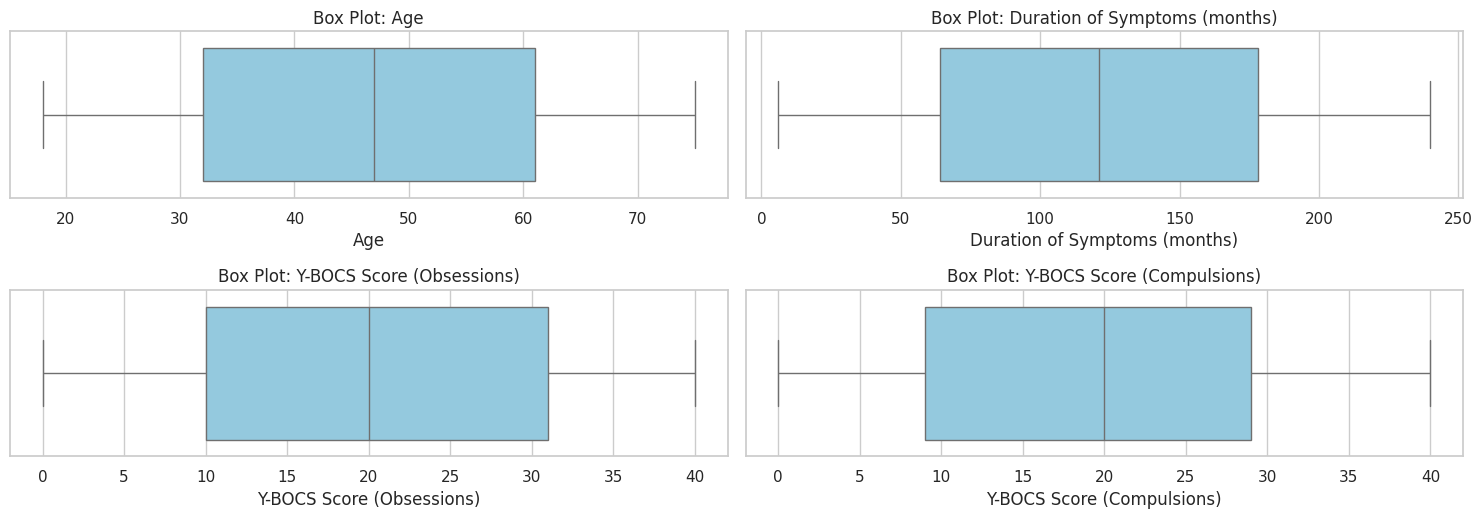

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

for i, variable in enumerate(selected_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[variable], color='skyblue')
    plt.title(f'Box Plot: {variable}')

plt.tight_layout()
plt.show()

In [ ]:
df['OCD Diagnosis Date']= pd.to_datetime(df['OCD Diagnosis Date'])

df['day']= df['OCD Diagnosis Date'].dt.day
df['month']= df['OCD Diagnosis Date'].dt.month
df['year']= df['OCD Diagnosis Date'].dt.year
df= df.drop(columns=['OCD Diagnosis Date'])
display(df)

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,day,month,year
0,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,15,7,2016
1,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,28,4,2017
2,57,Male,Hispanic,Divorced,College Degree,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,2,2,2018
3,27,Female,Hispanic,Married,College Degree,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,25,8,2014
4,56,Female,Hispanic,Married,High School,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN,20,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,38,Male,Hispanic,Divorced,College Degree,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI,10,1,2019
1496,19,Female,Hispanic,Divorced,Graduate Degree,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI,14,9,2022
1497,40,Male,Asian,Married,Some College,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine,13,3,2018
1498,37,Female,Caucasian,Married,Some College,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine,14,4,2018


<ipython-input-52-a039d9dfea57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender',y='Age',data=df,palette='viridis')


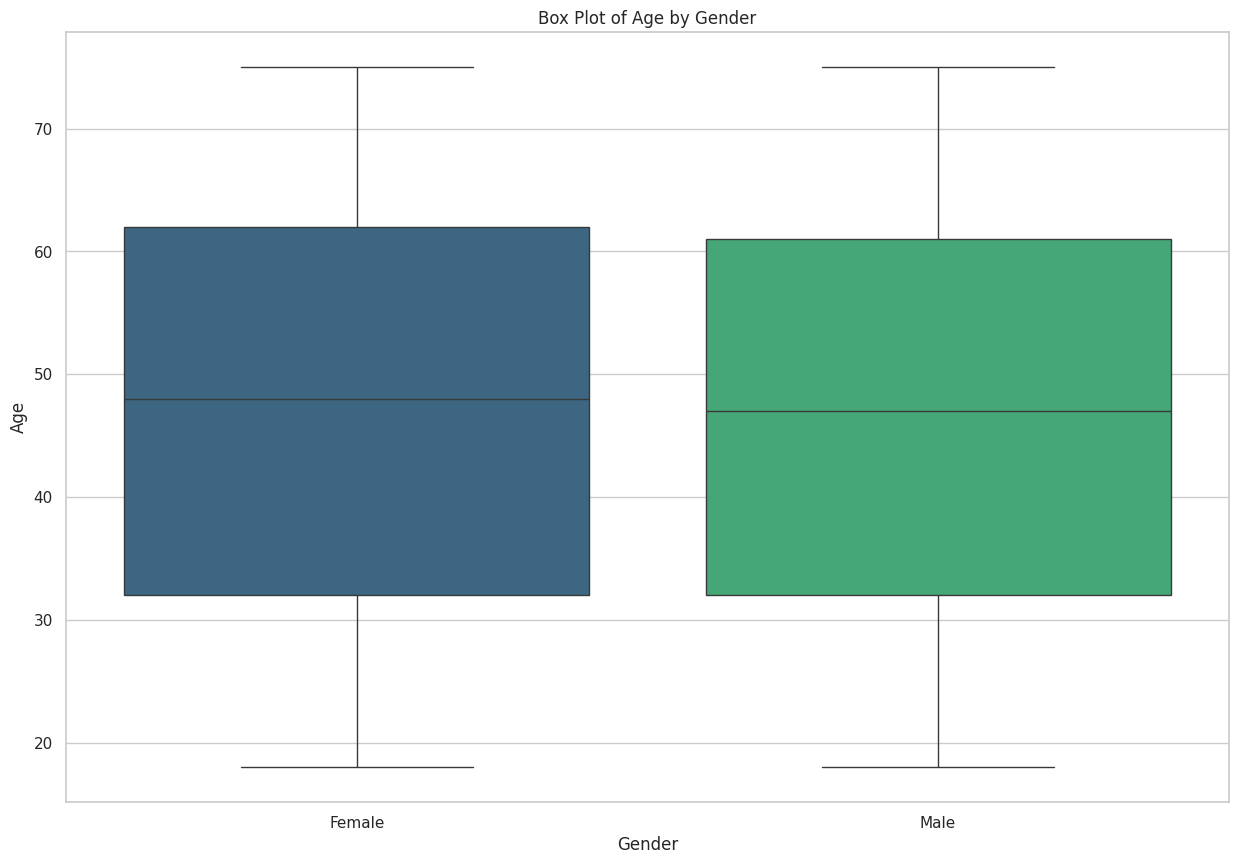

Gender,Female,Male
count,747.000000,753.000000
mean,46.933066,46.630810
std,16.956997,16.713614
min,18.000000,18.000000
25%,32.000000,32.000000
50%,48.000000,47.000000
75%,62.000000,61.000000
max,75.000000,75.000000


In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Gender',y='Age',data=df,palette='viridis')
plt.title('Box Plot of Age by Gender')
plt.show()

df.groupby('Gender')['Age'].describe().T

In [ ]:
df.groupby('Gender')['Age'].apply(lambda x: x.mode())


,,Age
Gender,,
Female,0,49
Male,0,70


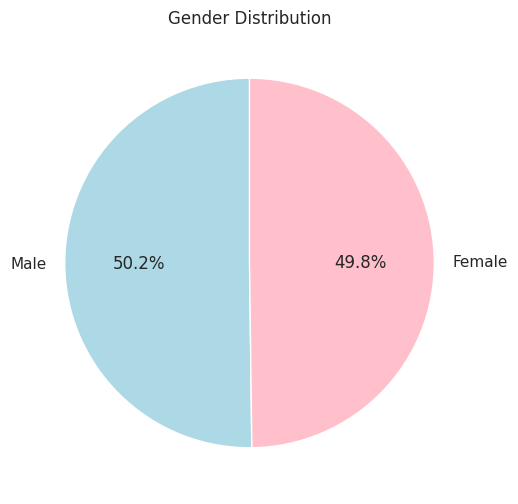

In [ ]:

# Get value counts for each gender
gender_counts = df['Gender'].value_counts()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=90)

# Title
plt.title('Gender Distribution')

# Show plot
plt.show()


  Marital Status  Count
0         Single    511
1        Married    507
2       Divorced    482


<ipython-input-55-b9ce1a648642>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital Status',y='Count',data=marital_counts,palette='viridis')


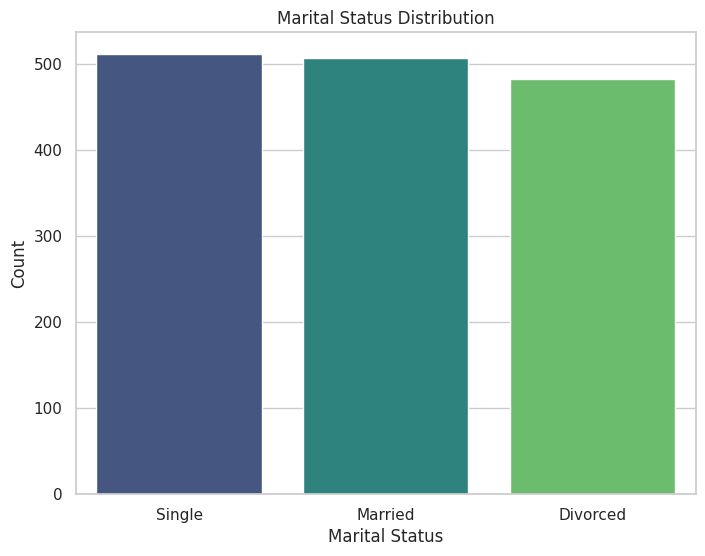

In [ ]:
marital_counts= df['Marital Status'].value_counts().reset_index()
marital_counts.columns= ['Marital Status','Count']
print(marital_counts)

sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.barplot(x='Marital Status',y='Count',data=marital_counts,palette='viridis')
plt.title('Marital Status Distribution')

plt.show()

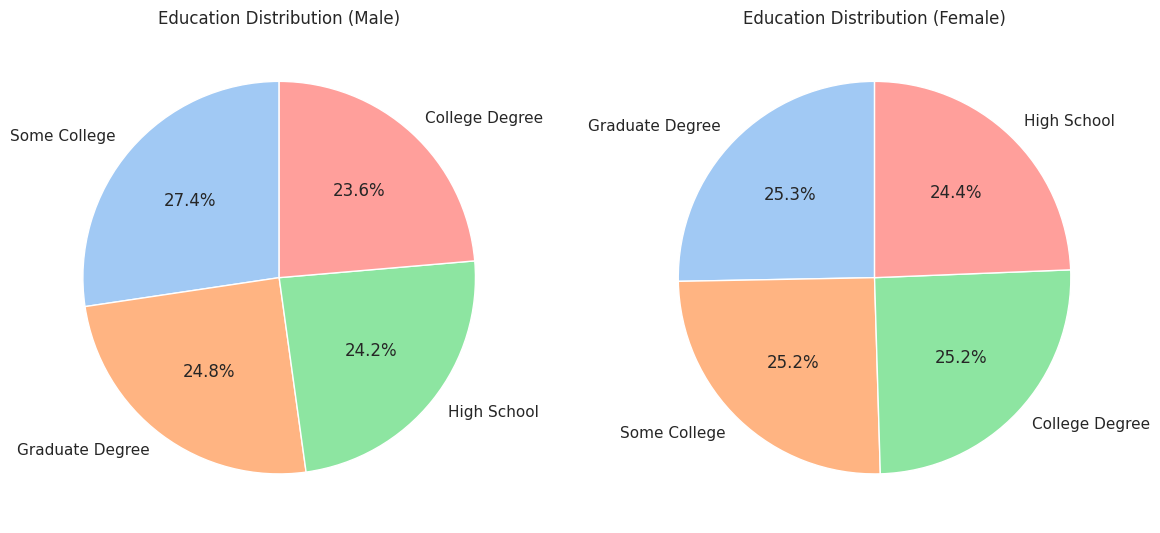

In [ ]:

# Filter data for Male and Female separately
male_education = df[df['Gender'] == 'Male']['Education Level'].value_counts()
female_education = df[df['Gender'] == 'Female']['Education Level'].value_counts()

# Set up the figure with two pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Males
axes[0].pie(male_education, labels=male_education.index, autopct='%1.1f%%',
            colors=sns.color_palette("pastel"), startangle=90)
axes[0].set_title("Education Distribution (Male)")

# Pie chart for Females
axes[1].pie(female_education, labels=female_education.index, autopct='%1.1f%%',
            colors=sns.color_palette("pastel"), startangle=90)
axes[1].set_title("Education Distribution (Female)")

# Display the plots
plt.tight_layout()
plt.show()


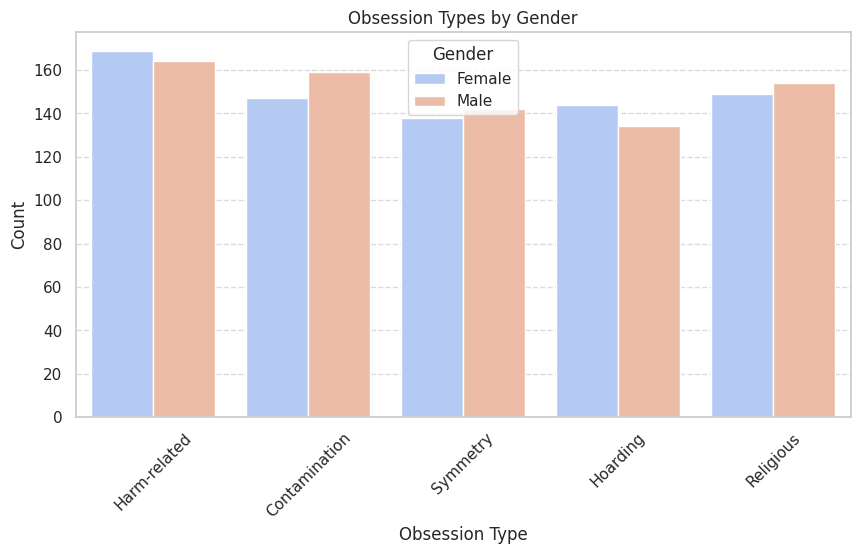

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Obsession Type", hue="Gender", palette="coolwarm")

plt.xlabel("Obsession Type")
plt.ylabel("Count")
plt.title("Obsession Types by Gender")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [ ]:
ethnicity_counts= df['Ethnicity'].value_counts().reset_index()
ethnicity_counts.columns= ['Ethnicity','Count']
print(ethnicity_counts)

print("\n")

obsetion_counts= df['Obsession Type'].value_counts().reset_index()
obsetion_counts.columns= ['Obsession Type','Count']
print(obsetion_counts)

print("\n")

history_counts= df['Family History of OCD'].value_counts().reset_index()
history_counts.columns= ['Family History of OCD','Count']
print(history_counts)

   Ethnicity  Count
0  Caucasian    398
1   Hispanic    392
2      Asian    386
3    African    324


  Obsession Type  Count
0   Harm-related    333
1  Contamination    306
2      Religious    303
3       Symmetry    280
4       Hoarding    278


  Family History of OCD  Count
0                   Yes    760
1                    No    740


# **Model Implimentation**

## 1. Data Preprocessing

In [ ]:
df.head(2)

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,day,month,year
0,32,Female,African,Single,Some College,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,15,7,2016
1,69,Male,African,Divorced,Some College,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,28,4,2017


In [ ]:
df.dropna(subset=["Previous Diagnoses", "Medications"], inplace=True)
df.reset_index(drop= True, inplace=True)
print(f"New dataset shape: {df.shape}")
df.isnull().sum()

New dataset shape: (925, 18)


,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
Duration of Symptoms (months),0
Previous Diagnoses,0
Family History of OCD,0
Obsession Type,0
Compulsion Type,0


In [ ]:
df=df.drop(columns=["day","month","year"])

In [ ]:
# Separate numerical and categorical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cats = encoder.fit_transform(df[categorical_cols])

In [ ]:
# Convert encoded categorical data to DataFrame
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))


In [ ]:
# Combine numerical and encoded categorical data
df_final = pd.concat([df[numerical_cols], encoded_cat_df], axis=1)



In [ ]:

# Apply Z-Score Scaling (Standardization)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_final)

## 2. Model Implimentation

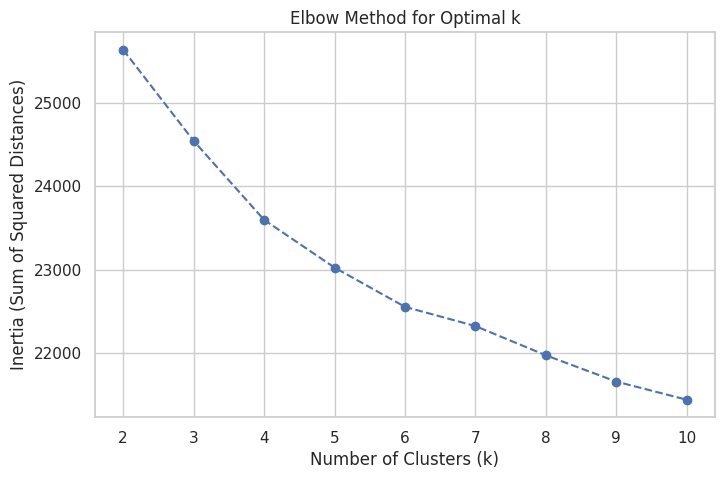

In [ ]:

# Find optimal k using Elbow Method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.show()


In [ ]:
# Choose the best k (e.g., from elbow method, let's assume k=4)
kmeans= KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_clusters= kmeans.fit_predict(df_scaled)

# Compute Silhouette Score
silhouette_avg= silhouette_score(df_scaled, kmeans_clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.0718


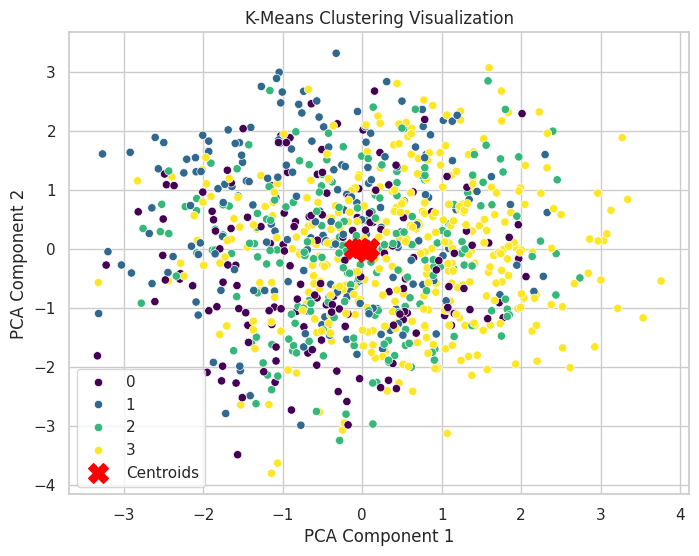

,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
Cluster,,,,
0,44.925926,123.611111,20.308642,20.611111
1,47.548913,119.744565,20.847826,19.798913
2,48.009524,124.833333,20.514286,20.366667
3,46.173442,124.021680,19.308943,18.653117


In [ ]:
# Apply PCA for 2D visualization
pca= PCA(n_components=2)
df_pca= pca.fit_transform(df_scaled)

# Plot K-Means Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_clusters, palette="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red", marker="X", s=200, label="Centroids")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization")
plt.legend()
plt.show()


# Ensure all categorical columns are encoded before computing the mean
cluster_summary= df.drop(columns=categorical_cols).groupby("Cluster").mean()
display(cluster_summary)


In [ ]:
# Add cluster labels to the original dataset
df["Cluster"]= kmeans_clusters

# Print each cluster's data
for cluster in sorted(df["Cluster"].unique()):
    print(f"\nCluster {cluster} Data:")
    print(df[df["Cluster"]==cluster].head())  # Display first few rows




Cluster 0 Data:
    Age  Gender  Ethnicity Marital Status Education Level  \
4    38  Female   Hispanic         Single  College Degree   
10   29    Male   Hispanic        Married  College Degree   
17   21  Female  Caucasian         Single    Some College   
19   60    Male      Asian       Divorced  College Degree   
21   22  Female      Asian       Divorced  College Degree   

    Duration of Symptoms (months) Previous Diagnoses Family History of OCD  \
4                             110                MDD                    No   
10                            108               PTSD                   Yes   
17                             14     Panic Disorder                    No   
19                            226                MDD                    No   
21                             90     Panic Disorder                    No   

   Obsession Type Compulsion Type  Y-BOCS Score (Obsessions)  \
4   Contamination         Praying                         12   
10       Symmetry  

## 3. Model Conclusion

<ipython-input-72-afa1020e2fe1>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


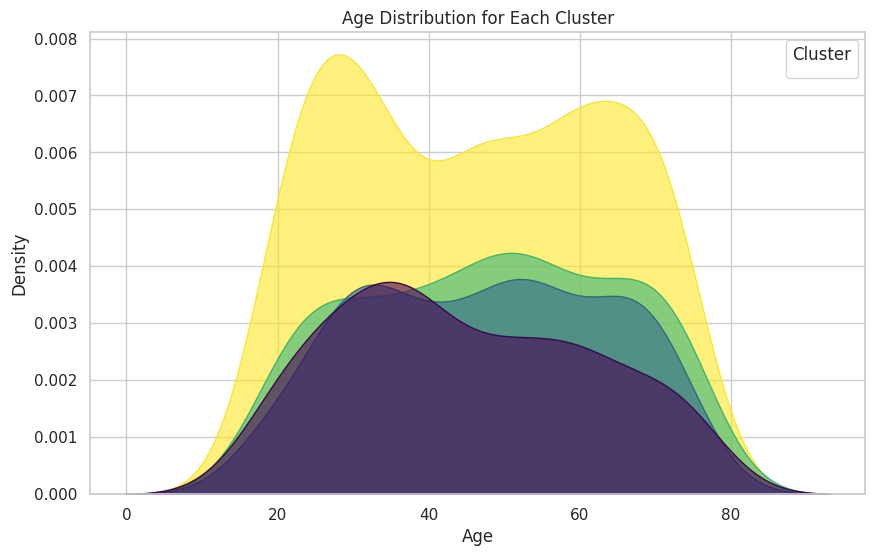

In [ ]:
# Plot age distribution for each cluster
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Age", hue="Cluster", fill=True, palette="viridis", alpha=0.6)

# Customize the plot
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution for Each Cluster")
plt.legend(title="Cluster")
plt.grid(True)

plt.show()

<ipython-input-73-8208ccb9a324>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


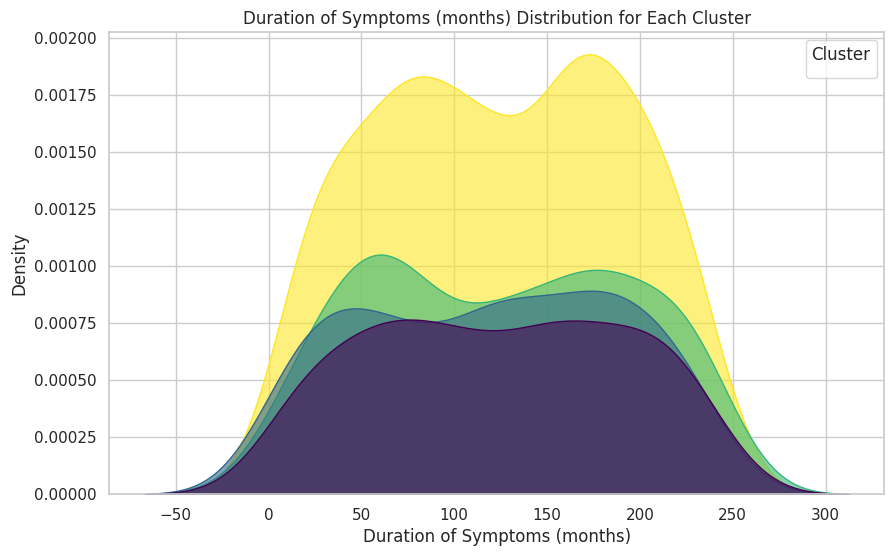

In [ ]:
# Plot age distribution for each cluster
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Duration of Symptoms (months)", hue="Cluster", fill=True, palette="viridis", alpha=0.6)

# Customize the plot
plt.xlabel("Duration of Symptoms (months)")
plt.ylabel("Density")
plt.title("Duration of Symptoms (months) Distribution for Each Cluster")
plt.legend(title="Cluster")
plt.grid(True)

plt.show()